# What are the number of reported deaths and reported cases in each continent by top 5 countries (A COMPARISON)?

In [98]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bolkonsky/covid19")

print("Path to dataset files:", path)

Path to dataset files: /Users/macbook/.cache/kagglehub/datasets/bolkonsky/covid19/versions/1


In [99]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter 
import matplotlib.ticker as mtick
import seaborn as sns 
from datasets import load_dataset

path = '/Users/macbook/Desktop/Python_Data_Project/3_Project_COVID-19/owid-covid-data.csv'

df = pd.read_csv(path)
df = df.copy()

df['total_deaths'] = df['total_deaths'].fillna(0).astype(int)
df['total_cases'] = df['total_cases'].fillna(0).astype(int)
df['date'] = pd.to_datetime(df['date'])

In [100]:
df_continent_country = df.groupby(['continent', 'location'])[['total_cases', 'total_deaths']].sum()
df_continent_country = df_continent_country.reset_index()
df_continent_country

,continent,location,total_cases,total_deaths
0,Africa,Algeria,3333579,153685
1,Africa,Angola,141005,6076
2,Africa,Benin,174587,3155
3,Africa,Botswana,95560,394
4,Africa,Burkina Faso,167562,8467
...,...,...,...,...
205,South America,Paraguay,952558,15122
206,South America,Peru,50207019,2039742
207,South America,Suriname,210740,3827
208,South America,Uruguay,175346,4628


- Datasets Created by Continents

In [101]:
df_plot_Africa = df_continent_country[df_continent_country['continent'] == 'Africa']
df_plot_Asia = df_continent_country[df_continent_country['continent'] == 'Asia']
df_plot_North_America = df_continent_country[df_continent_country['continent'] == 'North America']
df_plot_Europe = df_continent_country[df_continent_country['continent'] == 'Europe']
df_plot_Oceania = df_continent_country[df_continent_country['continent'] == 'Oceania']
df_plot_South_America = df_continent_country[df_continent_country['continent'] == 'South America']

- Datasets for Reported Cases

In [102]:
df_plot_Africa_cases = df_plot_Africa.sort_values(by='total_cases', ascending=False).head(5)
df_plot_Asia_cases = df_plot_Asia.sort_values(by='total_cases', ascending=False).head(5)
df_plot_North_America_cases = df_plot_North_America.sort_values(by='total_cases', ascending=False).head(5)
df_plot_Europe_cases = df_plot_Europe.sort_values(by='total_cases', ascending=False).head(5)
df_plot_South_America_cases = df_plot_South_America.sort_values(by='total_cases', ascending=False).head(5)
df_plot_Oceania_cases = df_plot_Oceania.sort_values(by='total_cases', ascending=False).head(5)

- Datasets for Reported Deaths

In [103]:
df_plot_Africa_deaths = df_plot_Africa.sort_values(by='total_deaths', ascending=False).head(5)
df_plot_Asia_deaths = df_plot_Asia.sort_values(by='total_deaths', ascending=False).head(5)
df_plot_North_America_deaths = df_plot_North_America.sort_values(by='total_deaths', ascending=False).head(5)
df_plot_Europe_deaths = df_plot_Europe.sort_values(by='total_deaths', ascending=False).head(5)
df_plot_South_America_deaths = df_plot_South_America.sort_values(by='total_deaths', ascending=False).head(5)
df_plot_Oceania_deaths = df_plot_Oceania.sort_values(by='total_deaths', ascending=False).head(5)

- Comparison plots for Reported Deaths and Reported Cases

/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_3366/440333805.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),
/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_3366/440333805.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),


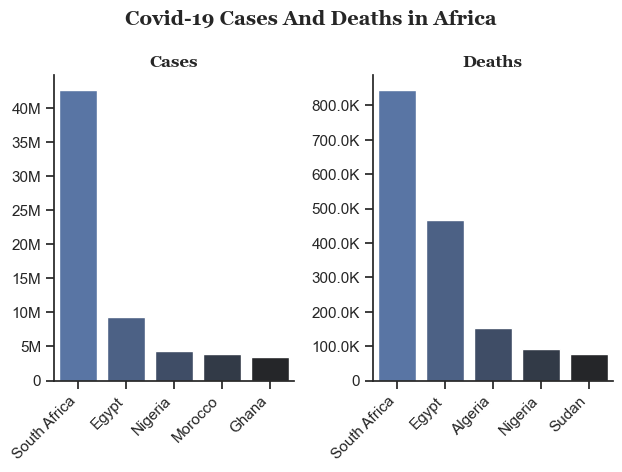

In [121]:
fig, ax = plt.subplots(1, 2)

value = lambda x, pos: f"{x/1_000_000:.0f}M" if x >= 1_000_000 else (f"{x/1000}K" if x >= 1000 else str(int(x)))
      
sns.set_theme(style='ticks')
sns.despine()
sns.barplot(data=df_plot_Africa_cases, 
            x='location', 
            y='total_cases', 
            ax=ax[0], 
            hue='location' , 
            palette='dark:b_r')
ax[0].set_title('Cases', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.barplot(data=df_plot_Africa_deaths, 
            x='location', 
            y='total_deaths', 
            ax=ax[1], 
            hue='location', 
            palette='dark:b_r')
ax[1].set_title('Deaths', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

# Rotate x-axis labels
for axis in ax:
    axis.set_xticklabels(axis.get_xticklabels(), 
                         rotation=45, 
                         ha='right')
    axis.yaxis.set_major_formatter(mtick.FuncFormatter(value))

fig.suptitle('Covid-19 Cases And Deaths in Africa', 
             fontweight='bold', 
             fontfamily='Georgia')
plt.tight_layout()
plt.show()

/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_3366/16003731.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),
/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_3366/16003731.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),


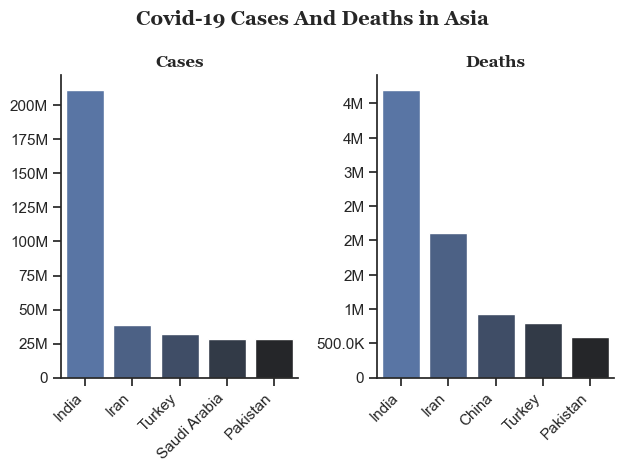

In [122]:
fig, ax = plt.subplots(1, 2)

value = lambda x, pos: f"{x/1_000_000:.0f}M" if x >= 1_000_000 else (f"{x/1000}K" if x >= 1000 else str(int(x)))

sns.set_theme(style='ticks')
sns.despine()
sns.barplot(data=df_plot_Asia_cases, 
            x='location', 
            y='total_cases', 
            ax=ax[0], 
            hue='location' , 
            palette='dark:b_r')
ax[0].set_title('Cases', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_Asia_deaths, 
            x='location', 
            y='total_deaths', 
            ax=ax[1], 
            hue='location', 
            palette='dark:b_r')
ax[1].set_title('Deaths', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

for axis in ax:
    axis.set_xticklabels(axis.get_xticklabels(), 
                         rotation=45, 
                         ha='right')
    axis.yaxis.set_major_formatter(mtick.FuncFormatter(value))


fig.suptitle('Covid-19 Cases And Deaths in Asia', 
             fontweight='bold', 
             fontfamily='Georgia')
plt.tight_layout()
plt.show()

/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_3366/2033940591.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),
/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_3366/2033940591.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),


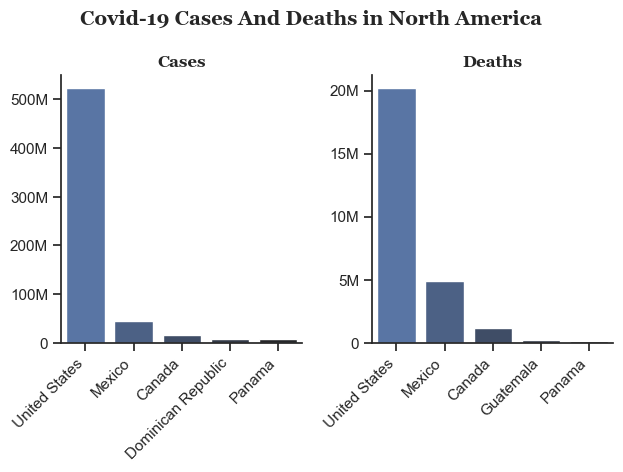

In [123]:
fig, ax = plt.subplots(1, 2)

value = lambda x, pos: f"{x/1_000_000:.0f}M" if x >= 1_000_000 else (f"{x/1000}K" if x >= 1000 else str(int(x)))

sns.set_theme(style='ticks')
sns.despine()
sns.barplot(data=df_plot_North_America_cases, 
            x='location', 
            y='total_cases', 
            ax=ax[0], 
            hue='location' , 
            palette='dark:b_r')
ax[0].set_title('Cases', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_North_America_deaths, 
            x='location', 
            y='total_deaths', 
            ax=ax[1], 
            hue='location', 
            palette='dark:b_r')
ax[1].set_title('Deaths', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

for axis in ax:
    axis.set_xticklabels(axis.get_xticklabels(), 
                         rotation=45, 
                         ha='right')
    axis.yaxis.set_major_formatter(mtick.FuncFormatter(value))


fig.suptitle('Covid-19 Cases And Deaths in North America', 
             fontweight='bold', 
             fontfamily='Georgia')
plt.tight_layout()
plt.show()

/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_3366/3253391694.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),
/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_3366/3253391694.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),


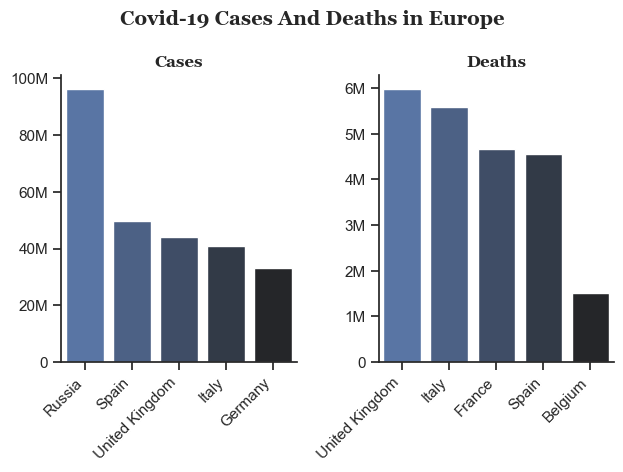

In [124]:
fig, ax = plt.subplots(1, 2)

value = lambda x, pos: f"{x/1_000_000:.0f}M" if x >= 1_000_000 else (f"{x/1000}K" if x >= 1000 else str(int(x)))

sns.set_theme(style='ticks')
sns.despine()
sns.barplot(data=df_plot_Europe_cases, 
            x='location', 
            y='total_cases', 
            ax=ax[0], 
            hue='location', 
            palette='dark:b_r')
ax[0].set_title('Cases', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_Europe_deaths, 
            x='location', 
            y='total_deaths', 
            ax=ax[1], 
            hue='location', 
            palette='dark:b_r')
ax[1].set_title('Deaths', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

for axis in ax:
    axis.set_xticklabels(axis.get_xticklabels(), 
                         rotation=45, 
                         ha='right')
    axis.yaxis.set_major_formatter(mtick.FuncFormatter(value))


fig.suptitle('Covid-19 Cases And Deaths in Europe', 
             fontweight='bold', 
             fontfamily='Georgia')
plt.tight_layout()

/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_3366/3221733739.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),
/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_3366/3221733739.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),


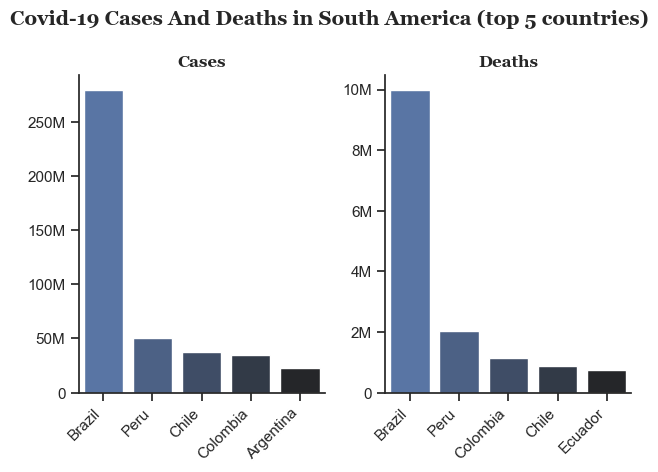

In [125]:
fig, ax = plt.subplots(1, 2)

value = lambda x, pos: f"{x/1_000_000:.0f}M" if x >= 1_000_000 else (f"{x/1000}K" if x >= 1000 else str(int(x)))

sns.set_theme(style='ticks')
sns.despine()
sns.barplot(data=df_plot_South_America_cases, 
            x='location', 
            y='total_cases', 
            ax=ax[0], 
            hue='location' , 
            palette='dark:b_r')
ax[0].set_title('Cases', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_South_America_deaths, 
            x='location', 
            y='total_deaths', 
            ax=ax[1], 
            hue='location', 
            palette='dark:b_r')
ax[1].set_title('Deaths', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

for axis in ax:
    axis.set_xticklabels(axis.get_xticklabels(), 
                         rotation=45, 
                         ha='right')
    axis.yaxis.set_major_formatter(mtick.FuncFormatter(value))


fig.suptitle('Covid-19 Cases And Deaths in South America (top 5 countries)', 
             fontweight='bold', 
             fontfamily='Georgia')
plt.tight_layout()

/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_3366/2059185082.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),
/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_3366/2059185082.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),


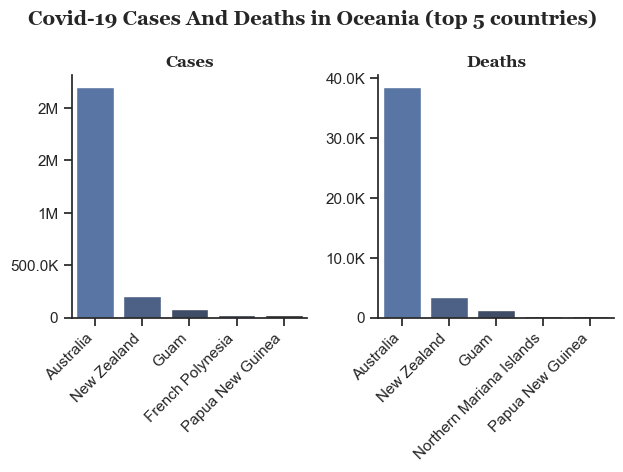

In [126]:
fig, ax = plt.subplots(1, 2)

value = lambda x, pos: f"{x/1_000_000:.0f}M" if x >= 1_000_000 else (f"{x/1000}K" if x >= 1000 else str(int(x)))

sns.set_theme(style='ticks')
sns.despine()
sns.barplot(data=df_plot_Oceania_cases, 
            x='location', 
            y='total_cases', 
            ax=ax[0], 
            hue='location' , 
            palette='dark:b_r')
ax[0].set_title('Cases', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.set_theme(style='ticks')
sns.barplot(data=df_plot_Oceania_deaths, 
            x='location', 
            y='total_deaths', 
            ax=ax[1], 
            hue='location', 
            palette='dark:b_r')
ax[1].set_title('Deaths', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

for axis in ax:
    axis.set_xticklabels(axis.get_xticklabels(), 
                         rotation=45, 
                         ha='right')
    axis.yaxis.set_major_formatter(mtick.FuncFormatter(value))

fig.suptitle('Covid-19 Cases And Deaths in Oceania (top 5 countries)',
             fontweight='bold', 
             fontfamily='Georgia')
plt.tight_layout()